In [190]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd




In [191]:
#Cargar el DataFrame
df=pd.read_json('C:/Users/renie/Downloads/TelecomX.json')
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [192]:
df.shape

(7267, 6)

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [194]:
df.dtypes

customerID    object
Churn         object
customer      object
phone         object
internet      object
account       object
dtype: object

In [195]:
df.isnull().sum()

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64

In [196]:
# Desanidar cada columna de diccionarios
df_customer = df['customer'].apply(pd.Series)
df_phone = df['phone'].apply(pd.Series)
df_internet = df['internet'].apply(pd.Series)

# Separar la columna 'account' en dos partes: generales y Charges
df_account = df['account'].apply(pd.Series)
df_charges = df_account['Charges'].apply(pd.Series)
df_account = df_account.drop(columns=['Charges'])

# Unir todo en un único DataFrame plano
df_final = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    df_customer,
    df_phone,
    df_internet,
    df_account,
    df_charges
], axis=1)

# Verifica el resultado
print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [197]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [198]:
# Paso 4: Crear columna 'Cuentas_Diarias'
df_final["Cuentas_Diarias"] = df_final["Monthly"] / 30
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.838333
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.836667
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.676667
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.261667


In [199]:
print("Análisis descriptivo - columnas numéricas:")
print(df_final.describe())

Análisis descriptivo - columnas numéricas:
       SeniorCitizen       tenure      Monthly  Cuentas_Diarias
count    7267.000000  7267.000000  7267.000000      7267.000000
mean        0.162653    32.346498    64.720098         2.157337
std         0.369074    24.571773    30.129572         1.004319
min         0.000000     0.000000    18.250000         0.608333
25%         0.000000     9.000000    35.425000         1.180833
50%         0.000000    29.000000    70.300000         2.343333
75%         0.000000    55.000000    89.875000         2.995833
max         1.000000    72.000000   118.750000         3.958333


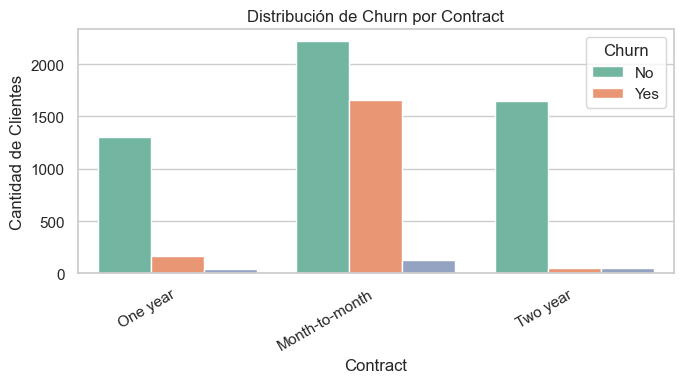

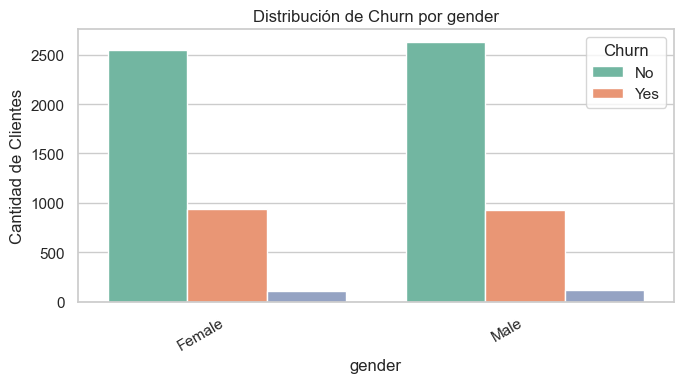

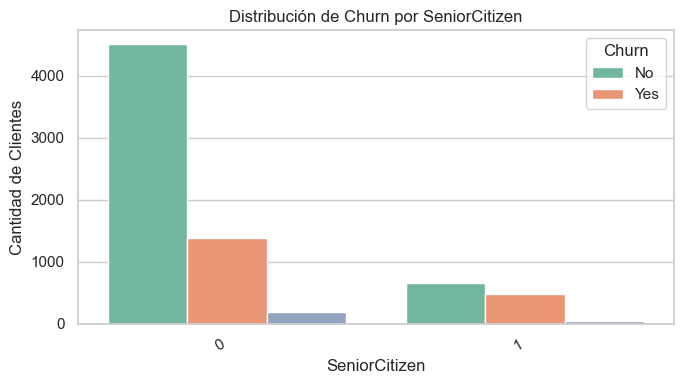

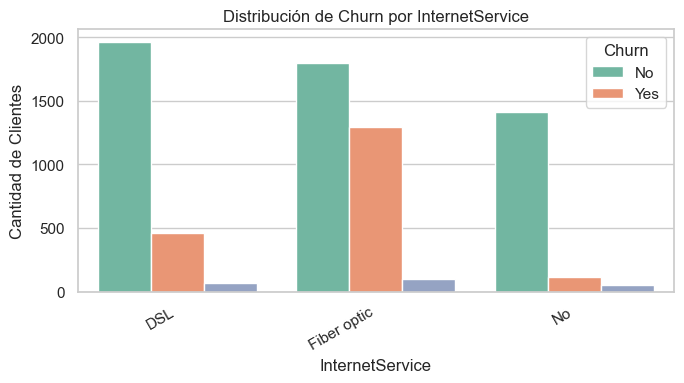

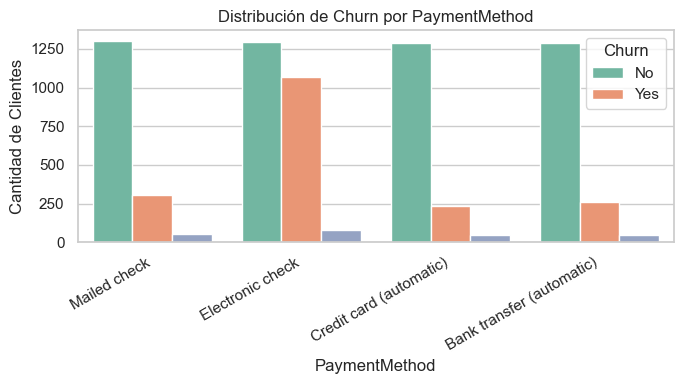

In [200]:


# Variables a analizar
variables = ['Contract', 'gender', 'SeniorCitizen', 'InternetService', 'PaymentMethod']

# Crear gráficos
for var in variables:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df_final, x=var, hue='Churn', palette='Set2')
    plt.title(f'Distribución de Churn por {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de Clientes')
    plt.xticks(rotation=30, ha='right')
    plt.legend(title='Churn')
    plt.tight_layout()
    plt.show()

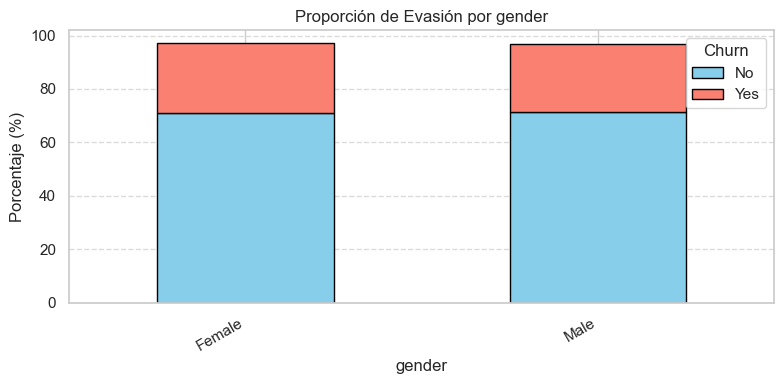

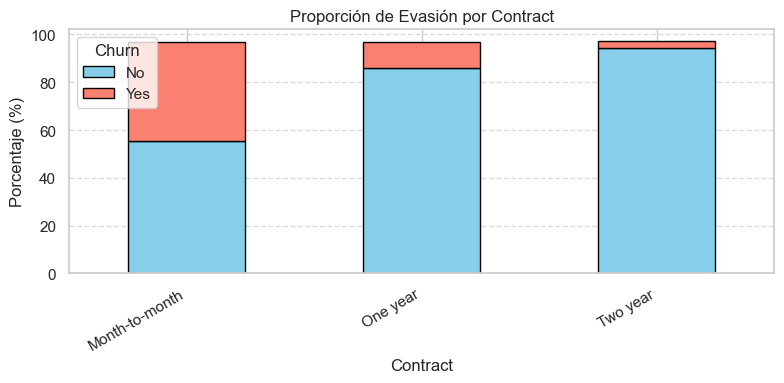

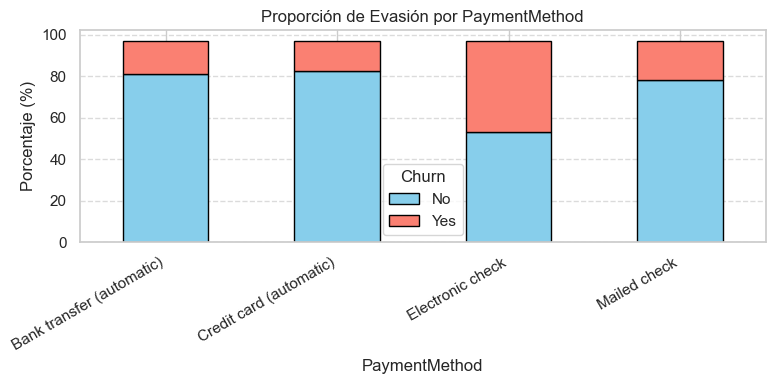

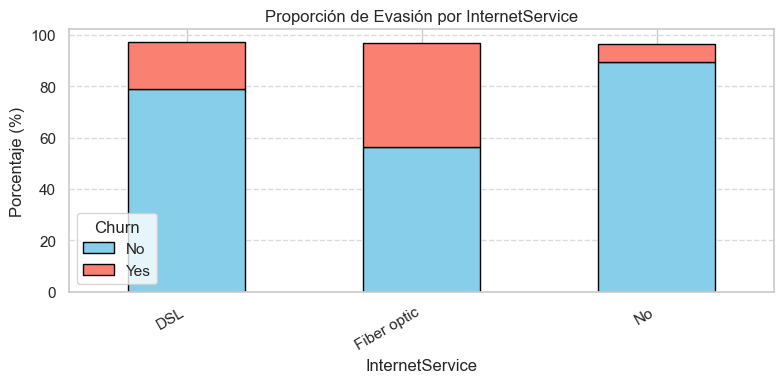

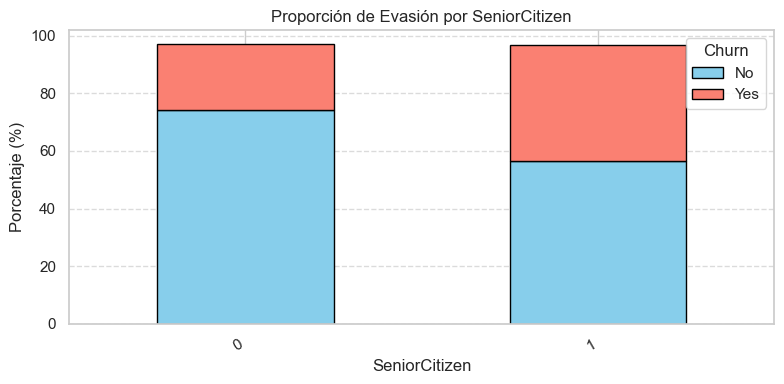

In [201]:
# Función para graficar proporción de evasión por variable categórica
def churn_proportion_plot(column):
    prop = pd.crosstab(df_final[column], df_final['Churn'], normalize='index') * 100
    if 'Yes' not in prop.columns:
        prop['Yes'] = 0  # Asegura que ambas clases existan
    if 'No' not in prop.columns:
        prop['No'] = 0
    prop = prop[['No', 'Yes']]  # Orden correcto
    prop.plot(kind='bar', stacked=True, figsize=(8, 4), color=['skyblue', 'salmon'], edgecolor='black')
    plt.title(f'Proporción de Evasión por {column}')
    plt.ylabel('Porcentaje (%)')
    plt.xlabel(column)
    plt.xticks(rotation=30, ha='right')
    plt.legend(title='Churn')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Lista de variables categóricas a explorar
categorical_vars = ['gender', 'Contract', 'PaymentMethod', 'InternetService', 'SeniorCitizen']

# Ejecutar gráfico por cada variable
for col in categorical_vars:
    churn_proportion_plot(col)

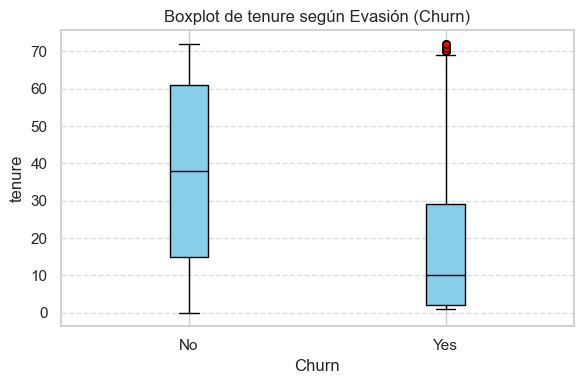

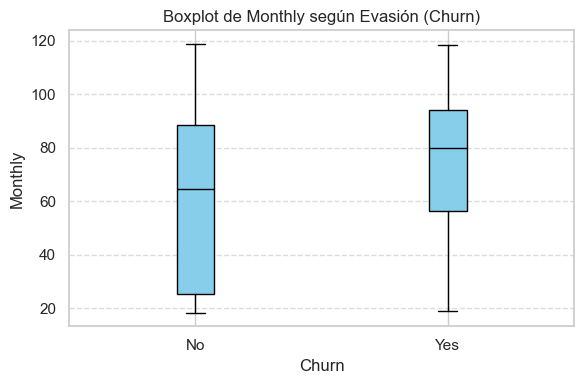

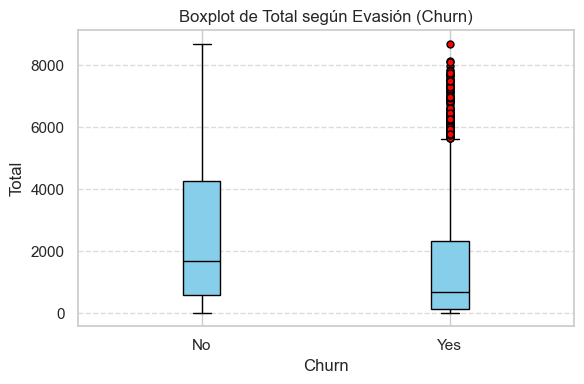

In [202]:
# Forzamos conversión de columnas numéricas
df_final['tenure'] = pd.to_numeric(df_final['tenure'], errors='coerce')
df_final['Monthly'] = pd.to_numeric(df_final['Monthly'], errors='coerce')
df_final['Total'] = pd.to_numeric(df_final['Total'], errors='coerce')

# Variables numéricas a graficar
numeric_vars = ['tenure', 'Monthly', 'Total']

# Crear boxplots por Churn
for var in numeric_vars:
    plt.figure(figsize=(6, 4))

    # Filtrar y limpiar datos numéricos válidos
    data_no = df_final[df_final['Churn'] == 'No'][var].dropna()
    data_yes = df_final[df_final['Churn'] == 'Yes'][var].dropna()

    # Verificar que ambos grupos no estén vacíos
    if data_no.empty or data_yes.empty:
        print(f"Omitiendo {var}: uno de los grupos está vacío o contiene datos inválidos.")
        continue

    # Graficar boxplot
    plt.boxplot([data_no, data_yes],
                patch_artist=True,
                medianprops=dict(color='black'),
                boxprops=dict(facecolor='skyblue'),
                flierprops=dict(marker='o', markerfacecolor='red', markersize=5, linestyle='none'))

    plt.xticks([1, 2], ['No', 'Yes'])
    plt.title(f'Boxplot de {var} según Evasión (Churn)')
    plt.xlabel('Churn')
    plt.ylabel(var)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

Informe de Análisis de Evasión de Clientes – TelecomX
1. Introducción
El presente análisis tiene como objetivo explorar el comportamiento de evasión de clientes (churn) en la empresa TelecomX. La evasión de clientes representa una pérdida significativa de ingresos para cualquier compañía de servicios, especialmente en sectores con alta competitividad como el de las telecomunicaciones. A través de este estudio, se busca identificar patrones y variables que influyen en la cancelación del servicio por parte de los clientes, lo que permitirá diseñar estrategias para reducir esta pérdida.

2. Limpieza y Tratamiento de Datos
El conjunto de datos original se encontraba en formato JSON, con información anidada en columnas como customer, account, phone e internet. Para su análisis se realizaron los siguientes pasos:

Importación de datos: Se utilizó pandas para cargar y estructurar el JSON.
Desanidación: Se aplicó apply(pd.Series) para expandir columnas anidadas.
Conversión de datos: Se convirtieron columnas como Monthly, Total y tenure a valores numéricos.
Creación de nuevas variables: Se generó la columna Cuentas_Diarias, que representa el gasto diario promedio (Monthly / 30).
Revisión de valores nulos y tipos de datos con .info() y .isnull().sum().
Esto permitió construir un DataFrame plano, listo para el análisis exploratorio.

3. Análisis Exploratorio de Datos (EDA)
Se exploró tanto la distribución general como la relación entre variables y el churn.

Distribución de la variable Churn
Se generaron gráficos de barras y pastel para visualizar la proporción de clientes que cancelaron el servicio (Yes) y los que permanecen (No).

Resultado: Aproximadamente el 26% de los clientes cancelaron el servicio.

Análisis por Variables Categóricas
Se exploraron variables como Contract, PaymentMethod, gender, InternetService, y SeniorCitizen con gráficos de barras y proporciones apiladas:

Contract: Los contratos Month-to-month tienen mayor tasa de evasión.
PaymentMethod: "Electronic check" muestra el mayor churn.
InternetService: Los clientes con "Fiber optic" cancelan más que los de "DSL".
SeniorCitizen: Los mayores de edad muestran una leve mayor tasa de cancelación.
Gender: No se observa diferencia significativa entre géneros.

Análisis por Variables Numéricas
Se analizaron tenure, Monthly, y Total usando histogramas y boxplots divididos por grupo de Churn.
Tenure: Los clientes que cancelan tienen poca antigüedad.
Monthly Charges: Los clientes con cargos mensuales altos cancelan más.
Total Charges: Quienes han gastado poco en total tienden a cancelar (coherente con baja permanencia).

Conclusiones e Insights
Contratos flexibles = mayor riesgo: Los contratos mensuales son más propensos a cancelaciones.

Altos cargos mensuales y baja permanencia: Clientes nuevos con tarifas altas presentan mayor churn.
Método de pago influye: Quienes pagan por Electronic check cancelan más, posiblemente por menor vinculación automatizada.
Servicios con más evasión: El uso de "Fiber optic" (posiblemente más costoso) se asocia con más bajas.
Clientes senior y con bajo Total son segmentos vulnerables.

5. Recomendaciones Estratégicas
Ofrecer incentivos en contratos mensuales:
Descuentos progresivos por antigüedad o renovación automática.
Revisión de precios para nuevos clientes con alta tarifa:
Segmentar a clientes con alto Monthly y bajo tenure para evitar cancelaciones tempranas.
Promover pagos automáticos:
Incentivar métodos como tarjeta o transferencia automática, reduciendo la evasión de pagos y cancelaciones.
Programas de fidelización para seniors:
Crear beneficios o atención especial para adultos mayores.
Campañas de retención temprana:

Detectar churn en primeros meses e intervenir con ofertas o encuestas.